In [3]:
from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods
from sklearn.linear_model import LogisticRegression #for LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

In [4]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/ZikaVirus/classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [8]:
df.shape

(155223, 19)

In [9]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [10]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [11]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [12]:
df.shape

(75345, 19)

## Feature Scaling

In [13]:
feature_scale = [feature for feature in df.columns if feature not in ['Target']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

,Target,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
0,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
1,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
2,0,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
3,1,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
4,0,0.505636,0.196981,0.742734,0.611940,0.731343,0.0,0.432258,0.26,0.792453,0.175824,0.61,0.763441,0.097011,0.558824,0.8,0.291429,0.333333,0.272727


# Train Test split

In [14]:
X = data.drop('Target',axis=1)
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10, stratify=y) #train test split in 50:50 ratio

In [15]:
X_train.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
9747,0.002883,0.588673,0.563257,0.537313,0.597015,0.0,0.625806,0.34,0.698113,0.087912,0.47,0.849462,0.006155,0.529412,0.6,0.437143,0.333333,0.090909
26293,0.000128,0.565977,0.552531,0.626866,0.701493,0.0,0.554839,0.48,0.849057,0.054945,0.56,0.881720,0.118406,0.558824,0.7,0.742857,0.333333,0.363636
41021,0.004803,0.645345,0.577569,0.791045,0.850746,0.0,0.625806,0.81,0.924528,0.252747,0.18,0.623656,0.007327,0.470588,1.0,0.225714,0.333333,0.636364
12705,0.001296,0.579009,0.530510,0.671642,0.701493,0.0,0.625806,0.14,0.792453,0.065934,0.21,0.731183,0.027550,0.529412,0.9,0.600000,0.333333,0.181818
48883,0.000317,0.582719,0.525652,0.641791,0.656716,0.0,0.625806,0.02,0.754717,0.021978,0.33,0.698925,0.030481,0.544118,0.9,0.397143,0.333333,0.818182


# Random Forest

In [28]:
rf_classifier=RandomForestClassifier(n_estimators=20).fit(X_train,y_train)
y_pred=rf_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9957 10410]
 [10964  6342]]
0.43264406869641386
              precision    recall  f1-score   support

           0       0.48      0.49      0.48     20367
           1       0.38      0.37      0.37     17306

    accuracy                           0.43     37673
   macro avg       0.43      0.43      0.43     37673
weighted avg       0.43      0.43      0.43     37673



### K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validation=KFold(10)

model = RandomForestClassifier() 
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('Max :',np.max(results))
print('Min :',np.min(results))
print('Mean :',np.mean(results))

[0.54917054 0.59402787 0.58779031 0.58155275 0.57996019 0.58109902
 0.57791346 0.50995487 0.41173347 0.53557207]
Max : 0.5940278699402787
Min : 0.4117334749137245
Mean : 0.5508774555128892


### Stratified K-fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model = RandomForestClassifier() 
scores=cross_val_score(model,X,y,cv=skfold)
print(scores)
print('Max :',np.max(scores))
print('Min :',np.min(scores))
print('Mean :',np.mean(scores))

[0.45189117 0.2540146  0.14240212 0.10670206 0.05560717 0.01566233
 0.00451287 0.13379347 0.40629148 0.48553225]
Max : 0.4855322537828511
Min : 0.004512874966817096
Mean : 0.20564095278576974


## Graphical Analysis

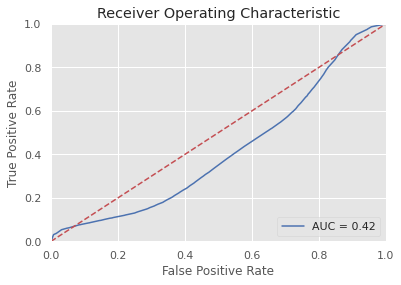

In [ ]:
from sklearn.metrics import roc_curve, auc

probs               = rf_classifier.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Tuning the model using grid searchCV


In [ ]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

n_estimators = [10, 100, 500]
max_features = ['sqrt', 'log2']
criterion = ['entropy','gini']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,criterion=criterion)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy',error_score=0, verbose=2)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 12 candidates, totalling 360 fits
[CV] criterion=entropy, max_features=sqrt, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_features=sqrt, n_estimators=10, total=   1.2s
[CV] criterion=entropy, max_features=sqrt, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  criterion=entropy, max_features=sqrt, n_estimators=10, total=   1.2s
[CV] criterion=entropy, max_features=sqrt, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=sqrt, n_estimators=10, total=   1.2s
[CV] criterion=entropy, max_features=sqrt, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=sqrt, n_estimators=10, total=   1.2s
[CV] criterion=entropy, max_features=sqrt, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=sqrt, n_estimators=10, total=   1.2s
[CV] criterion=entropy, max_features=sqrt, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=sqrt, n_estimators=10, total=   1.2s
[CV] criterion=entropy, max_features=sqrt, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=sqrt, n_estimators=10, total=   1.2s
[CV] criterion=entropy, max_features=sqrt, n_estimators=10 ...........
[CV]  criterion=entropy, max_features=sqrt, n_estimators=10, total=   1.2s
[CV] criterion=entropy, max_features=sqrt, n_esti

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 123.0min finished


Best: 0.452936 using {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 500}
0.448175 (0.008275) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}
0.452237 (0.008052) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
0.452892 (0.007794) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 500}
0.447184 (0.007235) with: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 10}
0.450467 (0.007535) with: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}
0.452936 (0.008167) with: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 500}
0.447618 (0.010117) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
0.450671 (0.007847) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
0.452600 (0.008339) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 500}
0.448052 (0.008563) with: {'criterion': 'gini', 'max_feat

Best: 0.452936 using {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 500}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Model with parameters

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[10067 10300]
 [10912  6394]]
Accuracy Score 0.4369442306160911
Classification report:               precision    recall  f1-score   support

           0       0.48      0.49      0.49     20367
           1       0.38      0.37      0.38     17306

    accuracy                           0.44     37673
   macro avg       0.43      0.43      0.43     37673
weighted avg       0.44      0.44      0.44     37673



In [17]:
rf_classifier = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',n_estimators=500,)
rf_classifier.fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.43731584954742125
[[10073 10294]
 [10904  6402]]
              precision    recall  f1-score   support

           0       0.48      0.49      0.49     20367
           1       0.38      0.37      0.38     17306

    accuracy                           0.44     37673
   macro avg       0.43      0.43      0.43     37673
weighted avg       0.44      0.44      0.44     37673



In [18]:
rf_classifier = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',n_estimators=500)
rf_classifier.fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.5944575690813049
[[15735  4632]
 [10646  6660]]
              precision    recall  f1-score   support

           0       0.60      0.77      0.67     20367
           1       0.59      0.38      0.47     17306

    accuracy                           0.59     37673
   macro avg       0.59      0.58      0.57     37673
weighted avg       0.59      0.59      0.58     37673



In [20]:
rf_classifier = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',n_estimators=1000)
rf_classifier.fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.5950149974783001
[[15849  4518]
 [10739  6567]]
              precision    recall  f1-score   support

           0       0.60      0.78      0.68     20367
           1       0.59      0.38      0.46     17306

    accuracy                           0.60     37673
   macro avg       0.59      0.58      0.57     37673
weighted avg       0.59      0.60      0.58     37673



In [23]:
rf_classifier = RandomForestClassifier(criterion='gini', max_depth=5, max_features='sqrt',n_estimators=1000)
rf_classifier.fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.5953600722002496
[[15837  4530]
 [10714  6592]]
              precision    recall  f1-score   support

           0       0.60      0.78      0.68     20367
           1       0.59      0.38      0.46     17306

    accuracy                           0.60     37673
   macro avg       0.59      0.58      0.57     37673
weighted avg       0.59      0.60      0.58     37673



In [31]:
rf_classifier = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',n_estimators=500)
rf_classifier.fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.5954397048283917
[[15855  4512]
 [10729  6577]]
              precision    recall  f1-score   support

           0       0.60      0.78      0.68     20367
           1       0.59      0.38      0.46     17306

    accuracy                           0.60     37673
   macro avg       0.59      0.58      0.57     37673
weighted avg       0.59      0.60      0.58     37673



## Graphical Analysis

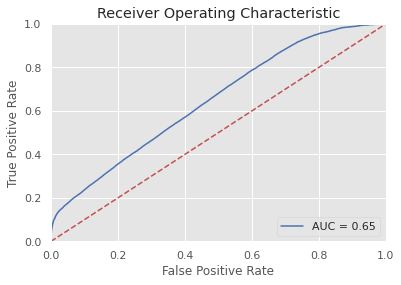

In [32]:
from sklearn.metrics import roc_curve, auc

probs               = rf_classifier.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
print('Accuracy before tuning :',accuracy_score(y_test,y_pred))
print()
print('Accuracy after tuning :',accuracy_score(y_test,prediction))

Accuracy before tuning : 0.43264406869641386

Accuracy after tuning : 0.5954397048283917
